## 7.5 AdaGrad算法

1. 动量法依赖于小的学习率,使梯度值有较大差别时,在梯度值较高的维度不至于发散,这样会导致梯度值小的维度迭代过慢
2. **AdaGrad根据自变量在每个维度的梯度值的大小来调整各个维度上的学习率，从而避免统一的学习率难以适应所有维度的问题**

### 7.5.1 算法

1. 使用一个小批量随机梯度$\boldsymbol{g}_{t}$,按元素平方的累加变量$\boldsymbol{s}_{t}$
2. 在时间步0,将$\boldsymbol{s}_{0}$每个元素初始化为0,在时间步$t$,将小批量梯度$\boldsymbol{g}_t$的元素平方累加到$\boldsymbol{s}_{t}$,$\odot$是按元素相乘
$$\boldsymbol{s}_{t} \leftarrow \boldsymbol{s}_{t-1} + \boldsymbol{g}_{t} \odot \boldsymbol{g}_{t}$$

3. 将目标函数自变量中每个元素的学习率通过按元素运算重新调整一下
$$\boldsymbol{x} \leftarrow \boldsymbol{x}_{t-1} - \frac{\eta}{\sqrt{\boldsymbol{s}_{t} + \epsilon}} \odot \boldsymbol{g}_{t}$$
$\eta$是学习率,$\epsilon$为了维持数值稳定性而添加的常数,如$10^{-6}$,$\frac{\eta}{\sqrt{\boldsymbol{s}_{t} + \epsilon}}$整体可看做学习率
4. 这里开方、除法和乘法的运算都是按元素运算的,使得目标函数自变量中每个元素都分别拥有自己的学习率

### 7.5.2 特点

1. 由上述可知,如果某个变量偏导较大,那么学习率下降较快,反之则会较慢;
2. $\boldsymbol{s}_{t}$	一直在累加按元素平方的梯度,自变量中每个元素的学习率在迭代过程中一直在降低（或不变）
3. **当学习率在迭代早期降得较快且当前解依然不佳时，AdaGrad算法在迭代后期由于学习率过小，可能较难找到一个有用的解**

仍以目标函数$f(x)=0.1x_1^2 + 2x_2^2$

In [2]:
%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch.utils as d2l

epoch 20, x1 -2.382563, x2 -0.158591


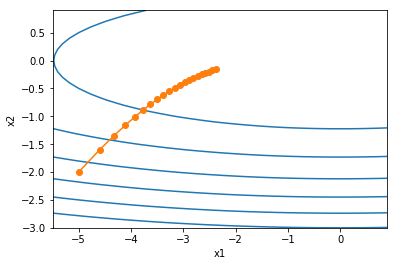

In [4]:
def adagrad_2d(x1, x2, s1, s2):
    g1, g2, epsilon = 0.2 * x1, 4 * x2, 1e-6  # 前两项为梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + epsilon) * g1
    x2 -= eta / math.sqrt(s2 + epsilon) * g2
    return (x1, x2, s1, s2)

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

# 由于st的累加效果使学习率不断衰减，自变量在迭代后期的移动幅度较小

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


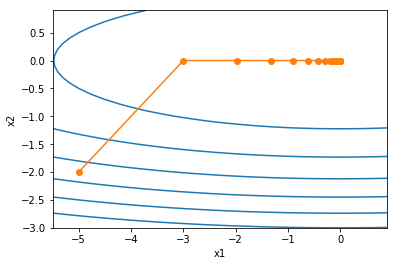

In [5]:
# 学习率增大到2。可自变量更为迅速地逼近了最优解
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

### 7.5.3 从零开始实现

In [6]:
features, labels = d2l.get_data_ch7()

def init_adagrad_states():
    s_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        s.data += (p.grad.data ** 2)
        p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s+eps)

loss: 0.243957, 0.080782 sec per epoch


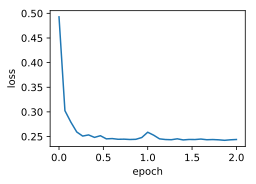

In [7]:
d2l.train_ch7(adagrad, init_adagrad_states(), {'lr': 0.1}, features, labels)

### 7.5.4 简洁实现

loss: 0.244626, 0.071846 sec per epoch


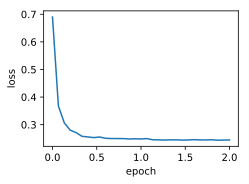

In [8]:
d2l.train_pytorch_ch7(torch.optim.Adagrad, {'lr': 0.1}, features, labels)